This code compares total ton-kilometers for organic and conventional crops.

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
data_dir = os.path.join('..', 'data')
out_dir = os.path.join('..', 'output/impact')

In [3]:
tkm = pd.read_csv(os.path.join(data_dir, 'inventory/tkm_inventory.csv'), index_col=0)
tkm

,"Winter wheat TOP, OeLN intensive, wholesale","Winter wheat TOP, OeLN extensive, wholesale","Winter wheat TOP, organic, wholesale","Winter wheat TOP, OeLN extensive, retail","Winter wheat TOP, organic, retail","Summer wheat TOP, OeLN intensive, wholesale","Summer wheat TOP, OeLN extensive, wholesale","Summer wheat TOP, organic, wholesale","Spelt, OeLN intensive, wholesale","Spelt, OeLN extensive, wholesale",...,"Meadow, OeLN intensive","Meadow, OeLN","Meadow, organic","Meadow forage, OeLN intensive, sale","Meadow forage, OeLN, sale","Meadow forage, organic, sale","Machine beans, OeLN","Machine beans, organic","Threshing peas, OeLN","Threshing peas, organic"
top soil,186.680689,192.561139,222.022922,192.561139,222.022922,186.680689,192.561139,221.152401,186.680689,192.561139,...,431.061195,431.416428,438.826999,486.314364,503.260889,518.967105,180.684866,194.074655,181.126601,196.037085
mid soil,82.933525,89.718284,103.555198,89.718284,103.555198,82.933525,89.718284,105.115185,82.933525,89.718284,...,197.389185,196.989893,204.294648,206.109996,216.135435,228.652554,63.821059,55.433876,61.464923,58.448084
bottom soil,30.030657,34.026837,43.731846,34.026837,43.731846,30.030657,34.026837,43.731846,30.030657,34.026837,...,45.795303,46.347654,50.343834,39.801033,44.349564,50.343834,3.621170,3.903419,3.621170,3.903419


In [4]:
crops = pd.read_excel(os.path.join(data_dir, 'inventory/organic_vs_conventional.xlsx'), sheetname='comparison')
crops

/home/sothomas/miniconda3/envs/py36_gis/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,organic full name,conventional full name,short name
0,"Winter wheat TOP, organic, wholesale","Winter wheat TOP, OeLN intensive, wholesale","wheat, winter"
1,"Summer wheat TOP, organic, wholesale","Summer wheat TOP, OeLN intensive, wholesale","wheat, summer"
2,"Rye, organic, wholesale","Rye, OeLN intensive, wholesale",rye
3,"Oat, organic, retail","Oat, OeLN extensive, retail",oat
4,"Triticale, organic, wholesale","Triticale, OeLN intensive, wholesale",triticale
5,"Winter barley, organic, wholesale","Winter barley, OeLN intensive, wholesale","barley, winter"
6,"Summer oat, organic, wholesale","Summer oat, OeLN intensive, wholesale","oat, summer"
7,"Fava beans, organic, wholesale","Fava beans, OeLN, wholesale","beans, fava"
8,"Protein peas, organic, wholesale","Protein peas, OeLN, wholesale","peas, protein"
9,"Sunflower, organic, wholesale","Sunflower, OeLN, wholesale",sunflower


In [5]:
top_soil_org = []
top_soil_conv = []
mid_soil_org = []
mid_soil_conv = []
bottom_soil_org = []
bottom_soil_conv = []

for i in crops.index:
    top_soil_org.append(tkm[crops['organic full name'][i]]['top soil'])
    top_soil_conv.append(tkm[crops['conventional full name'][i]]['top soil'])
    mid_soil_org.append(tkm[crops['organic full name'][i]]['mid soil'])
    mid_soil_conv.append(tkm[crops['conventional full name'][i]]['mid soil'])
    bottom_soil_org.append(tkm[crops['organic full name'][i]]['bottom soil'])
    bottom_soil_conv.append(tkm[crops['conventional full name'][i]]['bottom soil'])

In [6]:
crops['ts_org'] = top_soil_org
crops['ts_conv'] = top_soil_conv
crops['ms_org'] = mid_soil_org
crops['ms_conv'] = mid_soil_conv
crops['bs_org'] = bottom_soil_org
crops['bs_conv'] = bottom_soil_conv

In [7]:
crops.sort_values('ms_conv')

,organic full name,conventional full name,short name,ts_org,ts_conv,ms_org,ms_conv,bs_org,bs_conv
8,"Protein peas, organic, wholesale","Protein peas, OeLN, wholesale","peas, protein",117.089338,88.917644,62.426710,53.814567,30.312279,24.603451
7,"Fava beans, organic, wholesale","Fava beans, OeLN, wholesale","beans, fava",125.280661,88.917644,62.426710,53.814567,30.312279,24.603451
11,"Soy, organic, wholesale","Soy, OeLN, wholesale",soy,136.463308,100.100291,68.317051,59.704908,30.312279,24.603451
23,"Threshing peas, organic","Threshing peas, OeLN","peas, threshing",196.037085,181.126601,58.448084,61.464923,3.903419,3.621170
22,"Machine beans, organic","Machine beans, OeLN","beans, machine",194.074655,180.684866,55.433876,63.821059,3.903419,3.621170
9,"Sunflower, organic, wholesale","Sunflower, OeLN, wholesale",sunflower,141.871953,110.099297,72.851440,65.799285,34.308459,28.599631
10,"Rapeseed, organic, wholesale","Rapeseed, OeLN, wholesale",rapeseed,158.254600,132.602425,72.851440,67.879269,34.308459,28.599631
15,"Sugar beet, organic, wholesale","Sugar beet, OeLN, wholesale","beet, sugar",185.220810,172.350319,73.492576,70.080392,20.695021,14.986193
13,"Corncob mix, organic, from field","Corncob mix, OeLN, from field",corncob mix,164.909482,133.136826,77.805838,70.753683,34.308459,28.599631
12,"Grain maize, organic, wholesale","Grain maize, OeLN, wholesale","maize, grain",169.437247,137.664590,78.741781,71.689626,34.308459,28.599631


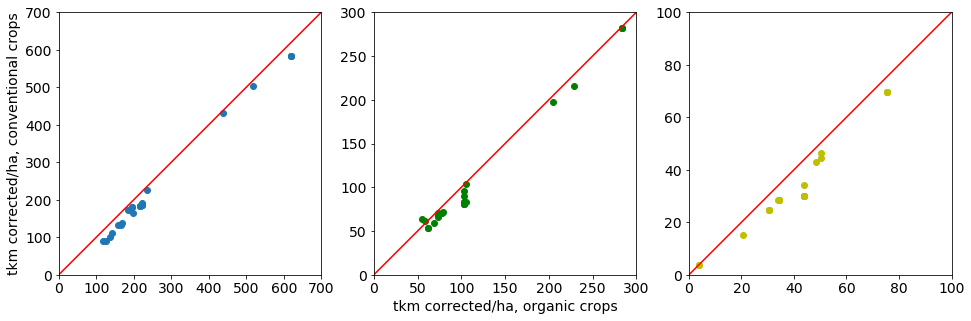

In [8]:
# creating the figure
fig = plt.figure(figsize=(16, 9))

# add first subplot
ax1 = fig.add_subplot(131)
ax1.tick_params(axis='both', which='major', labelsize=14)

plt.scatter(top_soil_org, top_soil_conv)

lim = 700
r = [0, lim]
plt.plot(r, r, 'r')

# adjust figure settings
ax1.set_xlim(0, lim)
ax1.set_ylim(0, lim)
ax1.set_xticks(np.linspace(0, 700, 8))
#ax1.set_xlabel("tkm corrected, organic crops", size=14)
ax1.set_ylabel("tkm corrected/ha, conventional crops", size=14)
ax1.set_aspect(1)


# add second subplot
ax2 = fig.add_subplot(132)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.scatter(mid_soil_org, mid_soil_conv, color='g')
 
lim = 300
r = [0, lim]
plt.plot(r, r, 'r')

# adjust figure settings
ax2.set_xlim(0, lim)
ax2.set_ylim(0, lim)
ax2.set_xlabel("tkm corrected/ha, organic crops", size=14)
#ax2.set_ylabel("tkm corrected, conventional crops", size=14)
ax2.set_aspect(1)


# add second subplot
ax3 = fig.add_subplot(133)
ax3.tick_params(axis='both', which='major', labelsize=14)

plt.scatter(bottom_soil_org, bottom_soil_conv, color='y')
    
lim = 100
r = [0, lim]
plt.plot(r, r, 'r')

# adjust figure settings
ax3.set_xlim(0, lim)
ax3.set_ylim(0, lim)
#ax3.set_xlabel("tkm corrected, organic crops", size=14)
#ax3.set_ylabel("tkm corrected, conventional crops", size=14)
ax3.set_aspect(1)

plt.savefig(os.path.join(out_dir, 'organic_vs_conventional.png'), dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show;

Difference in top soil:

In [9]:
dif_ts = (np.array(top_soil_org) - np.array(top_soil_conv)) / np.array(top_soil_conv) * 100

In [10]:
dif_ts

array([ 18.93191706,  18.46560137,  18.93191706,  15.29996304,
        18.93110536,  18.93110536,  18.93110536,  40.89516507,
        31.68290641,  28.85818278,  19.34517804,  36.3265851 ,
        23.07975949,  23.86466415,  19.19290667,   7.46763396,
         3.64648732,   6.237583  ,   6.237583  ,   6.237583  ,
         1.71773023,   3.12088955,   7.41057628,   8.23207881])

In [11]:
dif_ts.mean()

16.749008645068631

Difference in mid soil:

In [12]:
dif_ms = (np.array(mid_soil_org) - np.array(mid_soil_conv)) / np.array(mid_soil_conv) * 100

In [13]:
dif_ms

array([ 24.86530321,  26.74631302,  24.86530321,  15.4226242 ,
        27.25905859,  27.25905859,  27.25905859,  16.00336712,
        16.00336712,  10.71767726,   7.32502198,  14.42451392,
         9.8370649 ,   9.96719145,   7.35144662,   4.86895625,
         1.78140903,   0.47214755,   0.47214755,   0.47214755,
         3.70818753,   5.7913316 , -13.14171777,  -4.90822821])

In [14]:
dif_ms.mean()

11.03428128662698

Difference in bottom soil:

In [15]:
dif_bs = (np.array(bottom_soil_org)[np.array(bottom_soil_conv) > 0] -\
          np.array(bottom_soil_conv)[np.array(bottom_soil_conv) > 0]) /\
          np.array(bottom_soil_conv)[np.array(bottom_soil_conv) > 0] * 100

In [16]:
dif_bs

array([ 45.62400437,  45.62400437,  45.62400437,  28.5216295 ,
        45.62400437,  45.62400437,  45.62400437,  23.20336528,
        23.20336528,  19.96119671,  19.96119671,  23.20336528,
        19.96119671,  19.96119671,  13.33085673,  38.09392148,
        20.10328835,   8.19766092,   8.19766092,   8.19766092,
         8.62218396,  13.51596148,   7.79439295,   7.79439295])

In [17]:
dif_bs = dif_bs[dif_bs < 1000]

In [18]:
dif_bs.mean()

24.398688294603073

Difference in aggregated soil layers:

In [19]:
org = np.array(top_soil_org) + np.array(mid_soil_org) + np.array(bottom_soil_org)
conv = np.array(top_soil_conv) + np.array(mid_soil_conv) + np.array(bottom_soil_conv)

In [20]:
dif_tot = (org - conv) / conv * 100

In [21]:
dif_tot.mean()

15.548645035725619

Labeling crops in figure:

In [22]:
short = crops['short name'].values
tx = crops['ts_org'].values
ty = crops['ts_conv'].values 

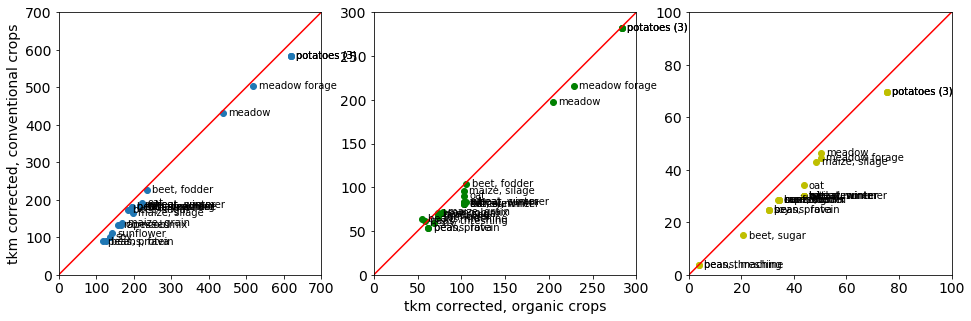

In [23]:
# creating the figure
fig = plt.figure(figsize=(16, 9))

# add first subplot
ax1 = fig.add_subplot(131)
ax1.tick_params(axis='both', which='major', labelsize=14)

plt.scatter(top_soil_org, top_soil_conv)

for x in zip(crops['short name'], tx, ty):
    ax1.annotate(x[0], xy=(x[1]+14, x[2]-7))
    
lim = 700
r = [0, lim]
plt.plot(r, r, 'r')

# adjust figure settings
ax1.set_xlim(0, lim)
ax1.set_ylim(0, lim)
ax1.set_xticks(np.linspace(0, 700, 8))
#ax1.set_xlabel("tkm corrected, organic crops", size=14)
ax1.set_ylabel("tkm corrected, conventional crops", size=14)
ax1.set_aspect(1)


# add second subplot
ax2 = fig.add_subplot(132)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.scatter(mid_soil_org, mid_soil_conv, color='g')

for x in zip(crops['short name'], crops['ms_org'], crops['ms_conv']):
    ax2.annotate(x[0], xy=(x[1]+6, x[2]-3))
    
lim = 300
r = [0, lim]
plt.plot(r, r, 'r')

# adjust figure settings
ax2.set_xlim(0, lim)
ax2.set_ylim(0, lim)
ax2.set_xlabel("tkm corrected, organic crops", size=14)
#ax2.set_ylabel("tkm corrected, conventional crops", size=14)
ax2.set_aspect(1)


# add second subplot
ax3 = fig.add_subplot(133)
ax3.tick_params(axis='both', which='major', labelsize=14)

plt.scatter(bottom_soil_org, bottom_soil_conv, color='y')

for x in zip(crops['short name'], crops['bs_org'], crops['bs_conv']):
    ax3.annotate(x[0], xy=(x[1]+2, x[2]-1))
    
lim = 100
r = [0, lim]
plt.plot(r, r, 'r')

# adjust figure settings
ax3.set_xlim(0, lim)
ax3.set_ylim(0, lim)
#ax3.set_xlabel("tkm corrected, organic crops", size=14)
#ax3.set_ylabel("tkm corrected, conventional crops", size=14)
ax3.set_aspect(1)

#plt.savefig(os.path.join(out_dir, 'organic_vs_conventional.png'), dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show;